<a href="https://colab.research.google.com/github/DaylaHoang/Credit-Card-Fraud-Detection-Project/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Machine Learning and Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Importing Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
# Importing Evaluation Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
# Importing Tools for Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Utility Imports
from collections import Counter
from IPython.display import Image
import pydotplus
# Configuring the Notebook
sns.set()
%matplotlib inline

## Exploratory Data Analysis

In [6]:
credit_card = pd.read_csv('./creditcardfraud.csv')
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## We can know that:


*   This dataset consists of **284,807 rows** and **31 columns**.
*   There are no missing values.
*   All columns contain numeric values.
*   The features Time and Amount are the only two that have not undergone PCA transformation:
*   *   Time represents the seconds elapsed between each transaction and the first transaction in the dataset.
*   *   Amount indicates the transaction amount.



In [8]:
credit_card[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


*   Time ranges from 0 to 172,792 seconds with a mean of 94,813 seconds.
*   Amount ranges from 0 to 25,691.16 units, with a mean of 88.35 units and a median of 22 units.

Both columns present a wide range of values. Next, we'll plot histograms to visualize their distributions based on the Class column (fraud or non-fraud).



<ipython-input-11-200c81333234>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card['Time'][credit_card['Class'] == 1], bins=15, ax=ax1, color='red')
<ipython-input-11-200c81333234>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card['Time'][credit_card['Class'] == 0], bins=15,

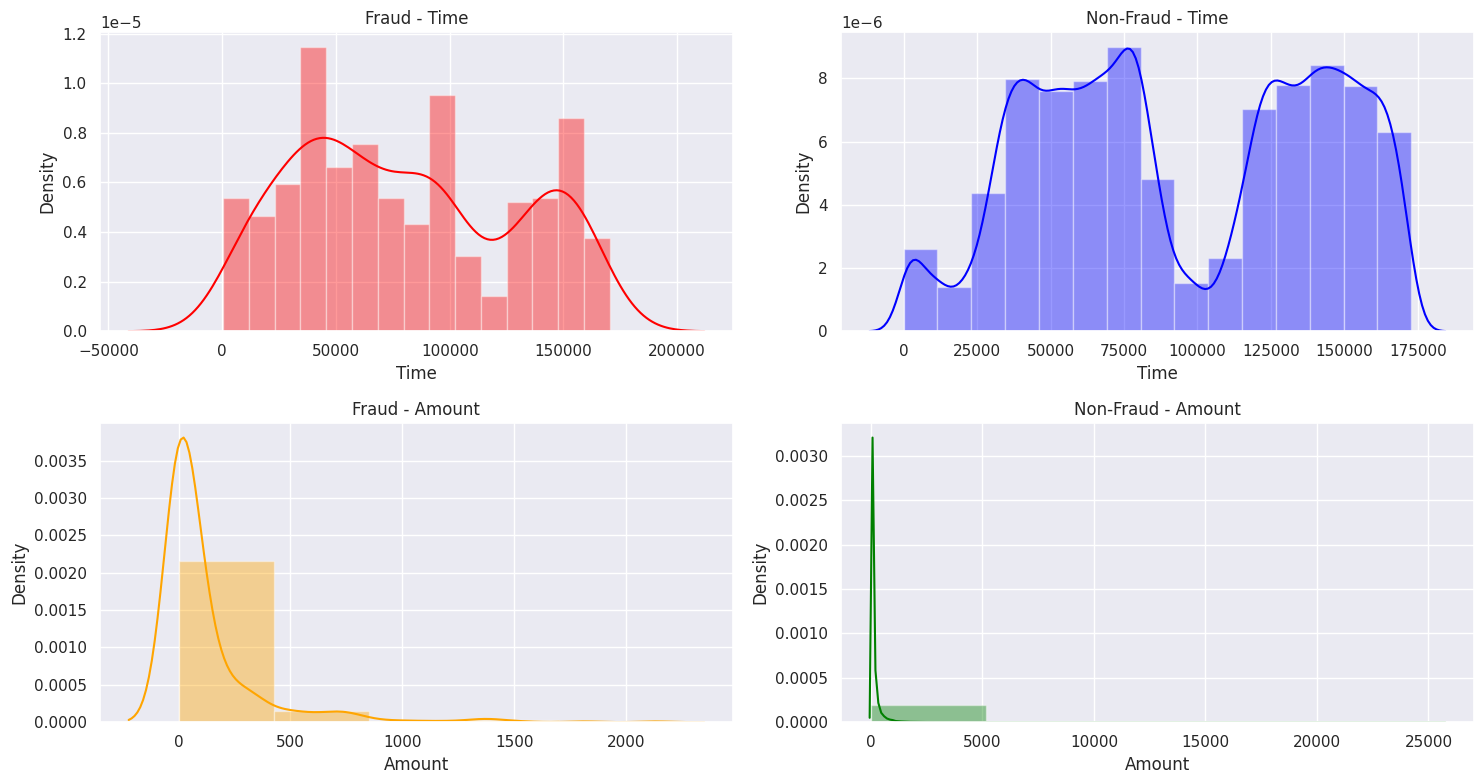

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

# Using different colors for each plot
sns.distplot(credit_card['Time'][credit_card['Class'] == 1], bins=15, ax=ax1, color='red')
sns.distplot(credit_card['Time'][credit_card['Class'] == 0], bins=15, ax=ax2, color='blue')

sns.distplot(credit_card['Amount'][credit_card['Class'] == 1], bins=5, ax=ax3, color='orange')
sns.distplot(credit_card['Amount'][credit_card['Class'] == 0], bins=5, ax=ax4, color='green')

# Titles for each subplot
ax1.set_title('Fraud - Time')
ax2.set_title('Non-Fraud - Time')
ax3.set_title('Fraud - Amount')
ax4.set_title('Non-Fraud - Amount')

plt.tight_layout()
plt.show()


From the histograms above, we can see that:
*  The Time feature appears to have a similar distribution for fraud and non-fraud cases but is not uniformly distributed across the dataset.
*  The Amount feature shows a skewed distribution, with most transactions involving relatively small amounts.
*  We can conclude that the Amount column is better distributed than the Time column.

Next, we'll create correlation heatmap for all the variables in the dataset


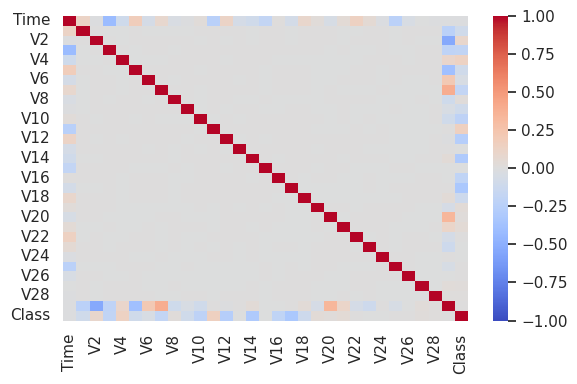

In [10]:
corr = credit_card.corr()
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr, cmap='coolwarm', vmin=-1)

plt.tight_layout()
plt.show()


There's not much correlation between these variables

## Preparing the Dataset

Since this dataset is highly imbalanced (99.83% of transactions being non-fraud), we'll need to address this imbalance to improve model performance:

In [12]:
# Checking Class Distribution
print(credit_card['Class'].value_counts(normalize=True))

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


In [13]:
# Initializing StandardScaler which standardizes features by removing the mean and scaling to unit variance (mean = 0, standard deviation = 1)
scaler = StandardScaler()
# Transforming Amount and Time Columns
credit_card['std_amount'] = scaler.fit_transform(credit_card['Amount'].values.reshape(-1, 1))
credit_card['std_time'] = scaler.fit_transform(credit_card['Time'].values.reshape(-1, 1))

credit_card.drop(['Amount', 'Time'], axis=1, inplace=True)
credit_card.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [14]:
# Splitting the Data for training
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Check if y_train contains NaN values and drop those rows if necessary
if y_train.isnull().any():
    print("Warning: y_train contains NaN values. Dropping those rows.")
    X_train = X_train.loc[~y_train.isnull()]
    y_train = y_train.dropna()

# Use RandomUnderSampler to balance X_train and y_train
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(pd.Series(y_rus).value_counts(normalize=True))

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [15]:
# Also use RandomOverSampler to balance the data and compare the results later
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print(pd.Series(y_ros).value_counts(normalize=True))

Class
0    0.5
1    0.5
Name: proportion, dtype: float64


## Machine Learning Models

We'll create four different machine learning models. We'll first start with **XGBoost**. Next, we'll use **Logistic Regression**, **K-nearest Neighbors (KNN)**, and **Decision Trees**. Finally, we'll compare the results of these models to find the most optimal one for this project.

## XGBoost







              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.95      0.80      0.87       146

    accuracy                           1.00     85443
   macro avg       0.98      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



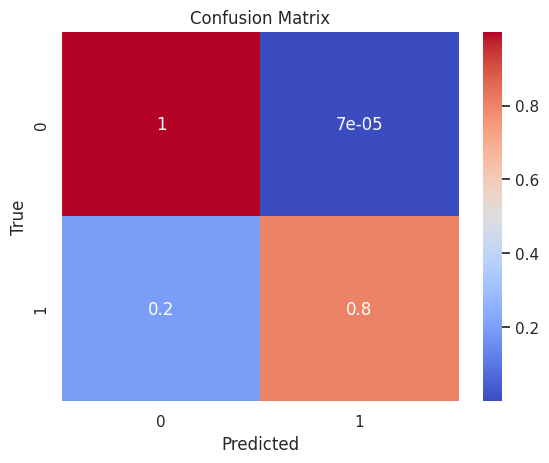

ROC AUC Score: 0.9006


In [19]:
def report(pred):
    print(classification_report(y_test, pred))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), annot=True, ax=ax, cmap='coolwarm')
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    plt.show()
    print(f'ROC AUC Score: {round(roc_auc_score(y_test, pred), 4)}')
# Train and predict using XGBoost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
report(y_pred_xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.90      0.84      0.87       146

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



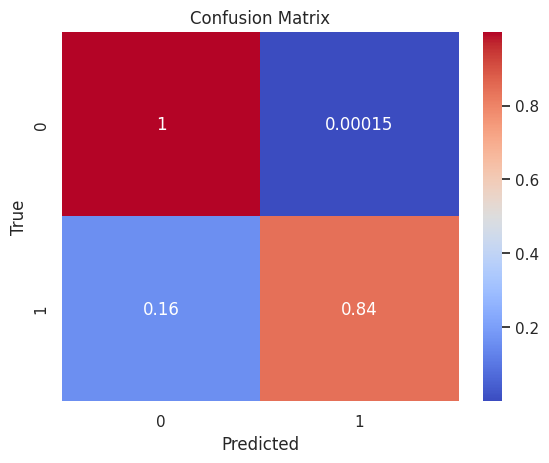

ROC AUC Score: 0.9212


In [20]:
# Tuning the scale_pos_weight hyperparameter to improve recall
# Caculating the ratio of non-fraud (class 0) to fraud (class 1) in the training set
counter = Counter(y_train)
estimate = counter[0] / counter[1]

# Implementing the XGBoost model with scale_pos_weight set to the calculated ratio
xgb = XGBClassifier(scale_pos_weight=estimate)
xgb.fit(X_train, y_train)
y_pred_xgb_scaled = xgb.predict(X_test)
report(y_pred_xgb_scaled)

## Logistic Regression

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85297
           1       0.05      0.90      0.10       146

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.98     85443



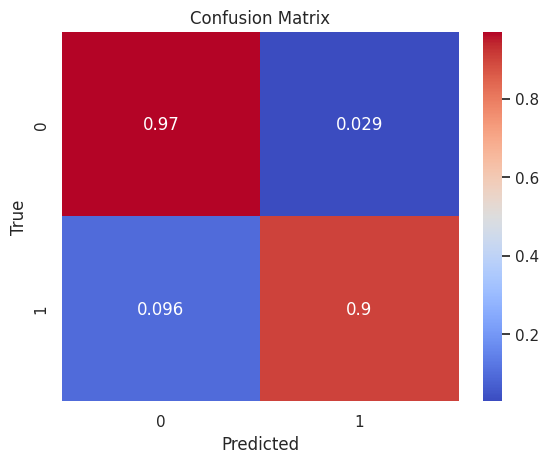

ROC AUC Score: 0.9374


In [21]:
# Training the Logistic Regression model using the undersampled training data (X_rus, y_rus)
log_reg_under = LogisticRegression()
log_reg_under.fit(X_rus, y_rus)
y_pred_log_under = log_reg_under.predict(X_test)
report(y_pred_log_under)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85297
           1       0.07      0.90      0.12       146

    accuracy                           0.98     85443
   macro avg       0.53      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



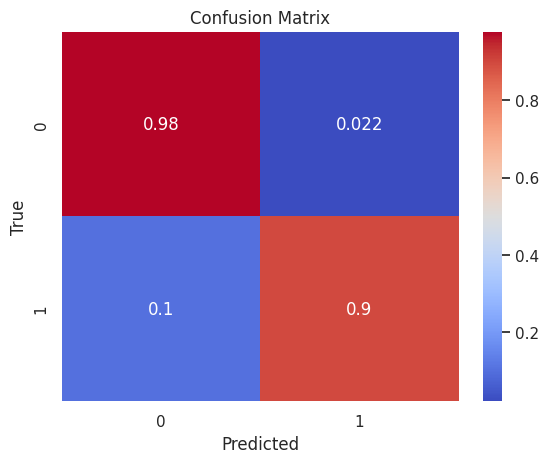

ROC AUC Score: 0.9376


In [22]:
# Training the Logistic Regression model using the oversampled training data (X_ros, y_ros)
log_reg_over = LogisticRegression()
log_reg_over.fit(X_ros, y_ros)
y_pred_log_over = log_reg_over.predict(X_test)
report(y_pred_log_over)

## K-nearest Neighbors

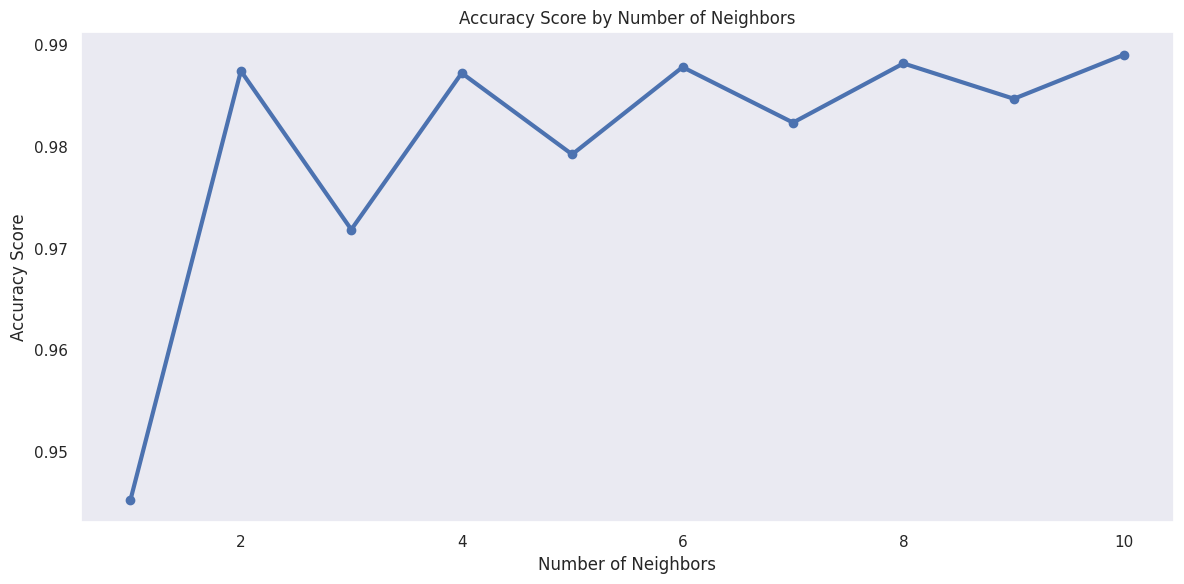

The best accuracy was 0.9891 with k=10.


In [23]:
# Set the maximum number of neighbors to test (1 to 10)
Ks = 11
acc_knn = np.zeros((Ks-1)) # Initialize an array to store the accuracy scores for each k
# Loop through different values of k (number of neighbors)
for k in range(1, Ks):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_rus, y_rus)
    y_pred_knn = knn.predict(X_test)
    acc_knn[k-1] = accuracy_score(y_test, y_pred_knn)

# Plot the accuracy scores for different k values
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(1, Ks), acc_knn, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Number of Neighbors')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Number of Neighbors')
ax.grid(False)
plt.tight_layout()
plt.show()

# Find the best k value and its corresponding accuracy score
best_k = acc_knn.argmax()+1
print(f'The best accuracy was {round(acc_knn.max(), 4)} with k={best_k}.')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85297
           1       0.12      0.88      0.22       146

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443



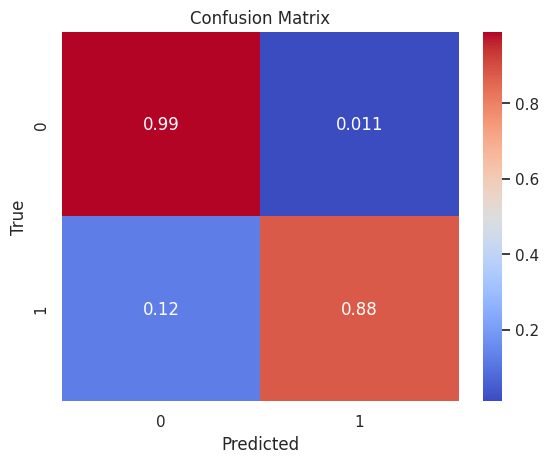

ROC AUC Score: 0.933


In [24]:
# Training the model with the underbalanced data
knn_under = KNeighborsClassifier(n_neighbors=best_k)
knn_under.fit(X_rus, y_rus)
y_pred_knn_under = knn_under.predict(X_test)
report(y_pred_knn_under)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85297
           1       0.57      0.85      0.68       146

    accuracy                           1.00     85443
   macro avg       0.79      0.92      0.84     85443
weighted avg       1.00      1.00      1.00     85443



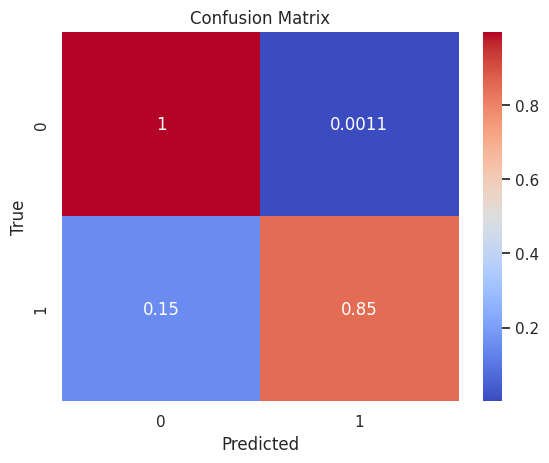

ROC AUC Score: 0.9241


In [26]:
# Training the model with the overbalanced data
knn_over = KNeighborsClassifier(n_neighbors=best_k)
knn_over.fit(X_ros, y_ros)
y_pred_knn_over = knn_over.predict(X_test)
report(y_pred_knn_over)

## Decision Trees

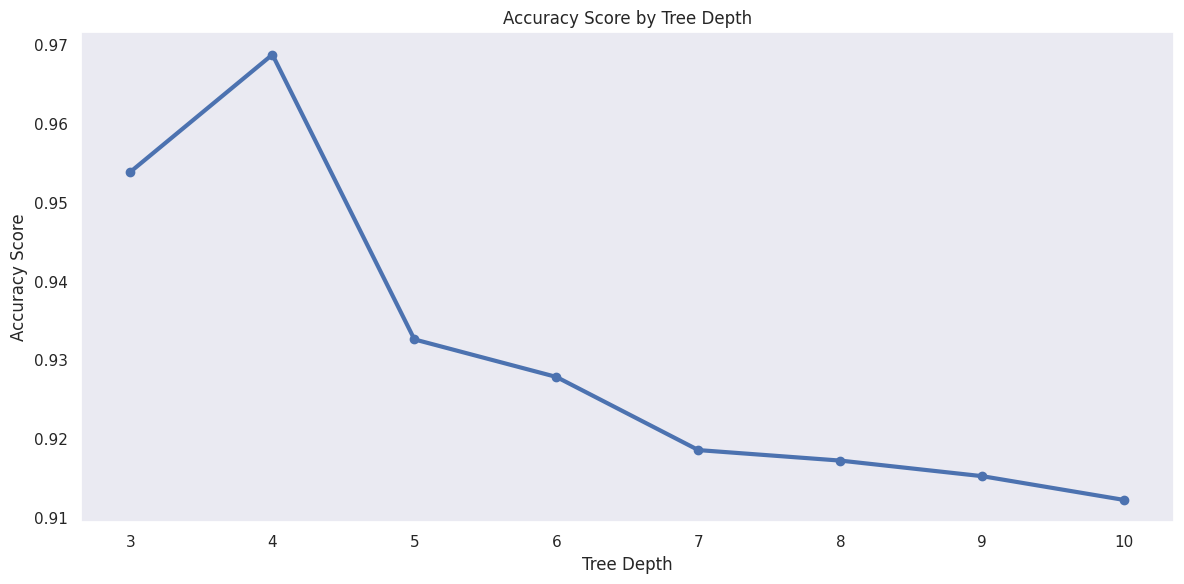

The best accuracy was 0.9688 with depth=4.


In [27]:
# Set the maximum depth range to test (from 3 to 10)
n = 11
# Initialize an array to store the accuracy scores for each tree depth
acc_tree = np.zeros((n-3))
# Loop through different tree depths (from 3 to 10)
for i in range(3, n):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree.fit(X_rus, y_rus)
    y_pred_tree = tree.predict(X_test)
    acc_tree[i-3] = accuracy_score(y_test, y_pred_tree)

# Plot the accuracy scores for different tree depths
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(3, n), acc_tree, linewidth=3, marker='o')
ax.set_title('Accuracy Score by Tree Depth')
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Tree Depth')
ax.grid(False)
plt.tight_layout()
plt.show()

# Find the best tree depth and its corresponding accuracy score
best_depth = acc_tree.argmax()+3
print(f'The best accuracy was {round(acc_tree.max(), 4)} with depth={best_depth}.')

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85297
           1       0.04      0.88      0.08       146

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



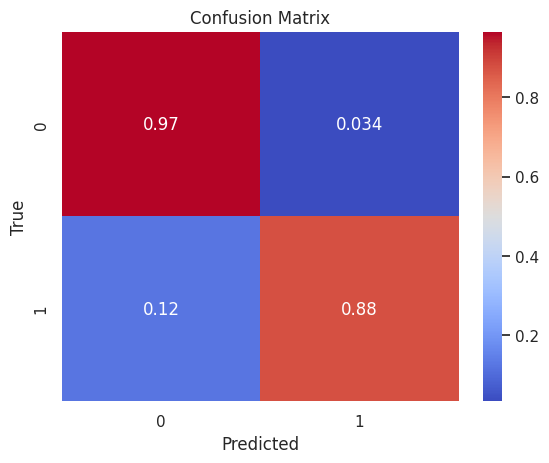

ROC AUC Score: 0.9213


In [28]:
# Training the model with the underbalanced data
tree_under = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
tree_under.fit(X_rus, y_rus)
y_pred_tree_under = tree_under.predict(X_test)
report(y_pred_tree_under)

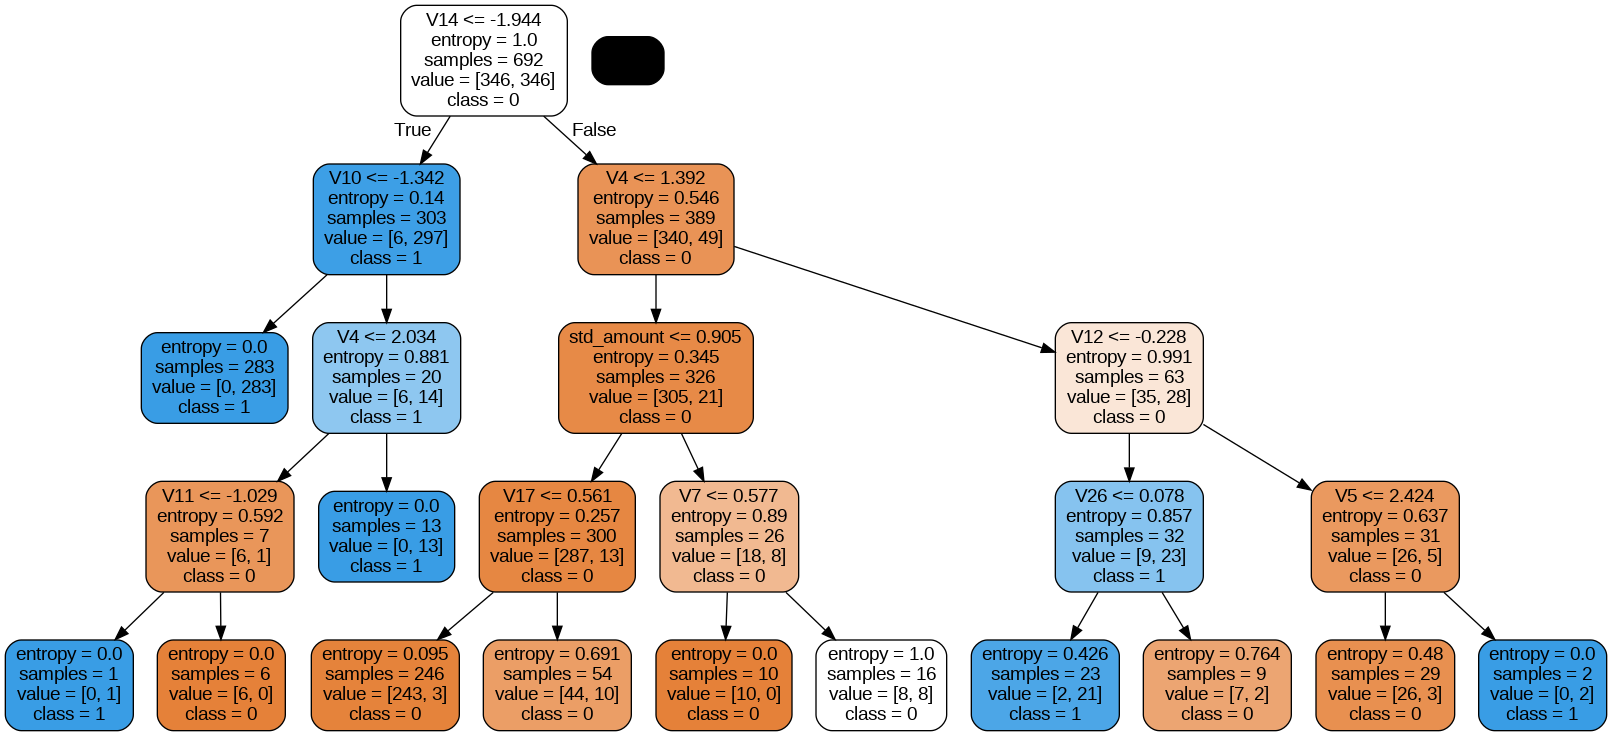

In [29]:
# We can export the trained decision tree into DOT format for visualization
# filled=True: Nodes are filled with colors based on the predicted class
# rounded=True: Rounded corners for better aesthetics
# feature_names: Display feature names at each node
# class_names: Label classes as '0' (non-fraud) and '1' (fraud)
dot = export_graphviz(
    tree_under,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['0', '1']
)

# Convert the DOT data into a graph using pydotplus
graph = pydotplus.graph_from_dot_data(dot)

# Generate and display a PNG image of the decision tree
Image(graph.create_png())

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85297
           1       0.08      0.86      0.15       146

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443



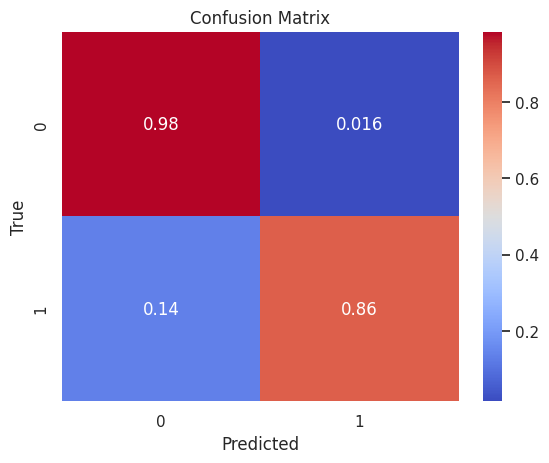

ROC AUC Score: 0.9235


In [30]:
# Training the model with the overbalanced data
tree_over = DecisionTreeClassifier(criterion='entropy', max_depth=best_depth)
tree_over.fit(X_ros, y_ros)
y_pred_tree_over = tree_over.predict(X_test)
report(y_pred_tree_over)

## Comparing these Models

In [31]:
summary = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'log_reg_under': [accuracy_score(y_test, y_pred_log_under), precision_score(y_test, y_pred_log_under), recall_score(y_test, y_pred_log_under), f1_score(y_test, y_pred_log_under), roc_auc_score(y_test, y_pred_log_under)],
'log_reg_over': [accuracy_score(y_test, y_pred_log_over), precision_score(y_test, y_pred_log_over), recall_score(y_test, y_pred_log_over), f1_score(y_test, y_pred_log_over), roc_auc_score(y_test, y_pred_log_over)],
'decision_trees_under': [accuracy_score(y_test, y_pred_tree_under), precision_score(y_test, y_pred_tree_under), recall_score(y_test, y_pred_tree_under), f1_score(y_test, y_pred_tree_under), roc_auc_score(y_test, y_pred_tree_under)],
'decision_trees_over': [accuracy_score(y_test, y_pred_tree_over), precision_score(y_test, y_pred_tree_over), recall_score(y_test, y_pred_tree_over), f1_score(y_test, y_pred_tree_over), roc_auc_score(y_test, y_pred_tree_over)],
'knn_under': [accuracy_score(y_test, y_pred_knn_under), precision_score(y_test, y_pred_knn_under), recall_score(y_test, y_pred_knn_under), f1_score(y_test, y_pred_knn_under), roc_auc_score(y_test, y_pred_knn_under)],
'knn_over': [accuracy_score(y_test, y_pred_knn_over), precision_score(y_test, y_pred_knn_over), recall_score(y_test, y_pred_knn_over), f1_score(y_test, y_pred_knn_over), roc_auc_score(y_test, y_pred_knn_over)],
'XGBoost': [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb), recall_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_xgb), roc_auc_score(y_test, y_pred_xgb)],
'XGBoost_scaled': [accuracy_score(y_test, y_pred_xgb_scaled), precision_score(y_test, y_pred_xgb_scaled), recall_score(y_test, y_pred_xgb_scaled), f1_score(y_test, y_pred_xgb_scaled), roc_auc_score(y_test, y_pred_xgb_scaled)]
}).set_index('labels')
summary.index.name = None

summary

,log_reg_under,log_reg_over,decision_trees_under,decision_trees_over,knn_under,knn_over,XGBoost,XGBoost_scaled
Accuracy,0.970612,0.977880,0.965732,0.983697,0.989069,0.998654,0.999590,0.999579
Precision,0.050209,0.065304,0.042133,0.084056,0.122605,0.571429,0.951220,0.904412
Recall,0.904110,0.897260,0.876712,0.863014,0.876712,0.849315,0.801370,0.842466
F1_score,0.095135,0.121747,0.080402,0.153191,0.215126,0.683196,0.869888,0.872340
roc_auc,0.937418,0.937639,0.921298,0.923459,0.932987,0.924112,0.900650,0.921157


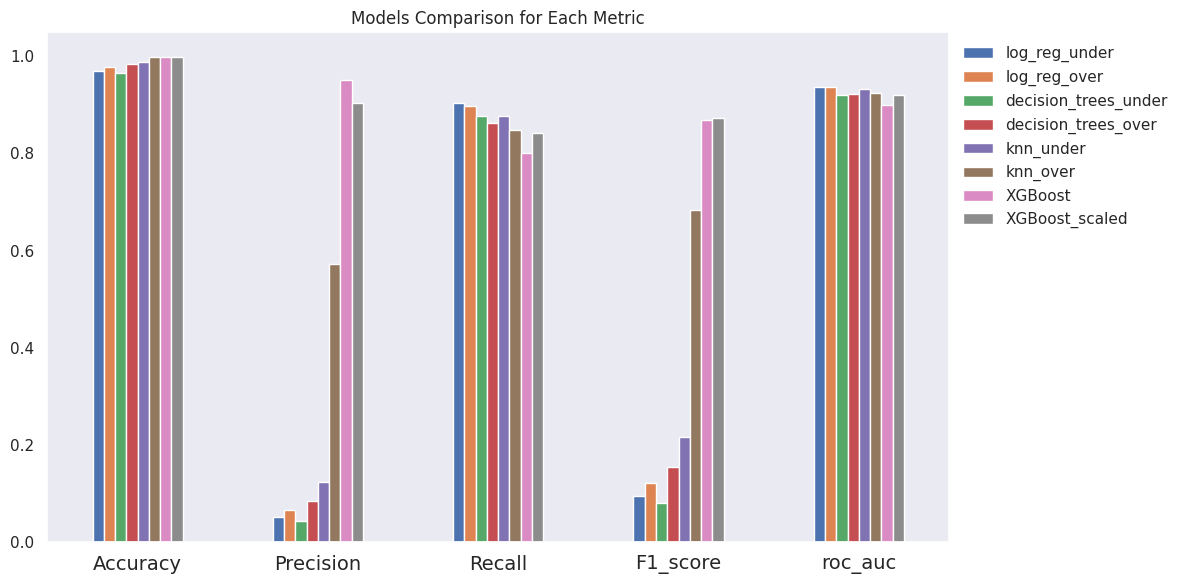

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
summary.plot.bar(ax=ax)
ax.legend(bbox_to_anchor=(1, 1), frameon=False)
ax.grid(False)
ax.set_title('Models Comparison for Each Metric')
plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

Based on the graph, we can see that **XGBoost** seems to be the best for most metrics:
*   **Accuracy**: XGBoost achieves one of the highest accuracy scores
*   **Precision**: XGBoost outperforms other models in precision which is very important because we want minimal false positives
*   **Recall**: XGBoost also performs pretty well in correctly identifies a high proportion of actual fraud cases
*   **F1 Score**: XGBoost gives the highest F1 score, balancing precision and recall; hence, it is the most suitable for imbalanced datasets such as fraud detection
*   **ROC AUC**: Similarly, this metric also shows a very good overall performance in classification
